Task 1

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
img = cv.imread('lenna.png')
img = cv.cvtColor(np.float32(img), cv.COLOR_BGR2GRAY)

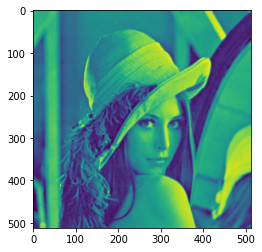

In [ ]:
# Apply Gaussian filter
img_smooth = cv.GaussianBlur(img, (5,5), 1)
plt.imshow(img_smooth)

In this step a gaussian filter is applied to the image that blurs a image by smooting sharp transitions in intensity between neighboring pixels. This has the effect of reducing noise in the image and making it appear smoother.

In [ ]:
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
Gx = cv.filter2D(src=img_smooth, kernel=sobel_x, ddepth=-1)
Gy = cv.filter2D(src=img_smooth, kernel=sobel_y, ddepth=-1)

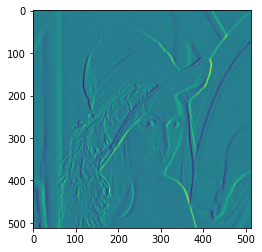

In [ ]:
plt.imshow(Gx)

A sobel filter is applied in horizontal direction that is more sensitive to detect edges in horizontal direction

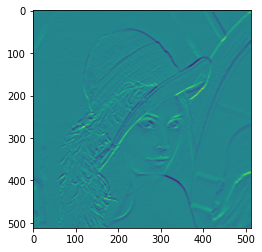

In [ ]:
plt.imshow(Gy)

A sobel filter is applied in horizontal direction that is more sensitive to detect edges in horizontal direction

Task 2

2.1

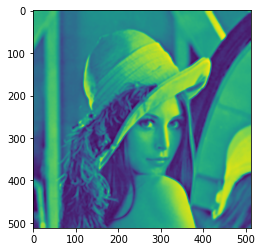

In [ ]:
#Average smooting
img_smooth = cv.blur(img, (5,5))
plt.imshow(img_smooth)

Difference between average smoothing and Gaussian smoothing is that in an average smoothing filter, each pixel is replaced by the average value of the neighboring pixels with each neighboring pixel having equal weight whereas the Gaussian smoothing assigns more weight to pixels that are closer to the center of the window and less weight to pixels that are farther away. As a result in the output of average smooting i can see more smoothing applied to edges but not in gaussian

2.2

In [ ]:
#Sobel feldman operator
sobel_x = np.array([[3, 10, 3], [0, 0, 0], [-3, -10, -3]])
sobel_y = np.array([[3, 0, -3], [10, 0, -10], [3, 0, -3]])
Gx = cv.filter2D(src=img_smooth, kernel=sobel_x, ddepth=-1)
Gy = cv.filter2D(src=img_smooth, kernel=sobel_y, ddepth=-1)

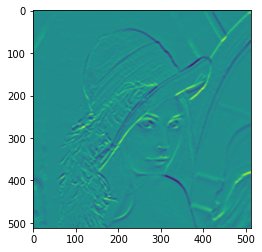

In [ ]:
plt.imshow(Gx)

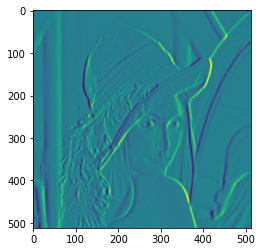

In [ ]:
plt.imshow(Gy)

I can observe that this operator produces more prominent edges as compared to default sobel operator

In [ ]:
#Scharr Operator
sobel_x = np.array([[47, 162, 47], [0, 0, 0], [-47, -162, -47]])
sobel_y = np.array([[47, 0, -47], [162, 0, -162], [47, 0, -47]])
Gx = cv.filter2D(src=img_smooth, kernel=sobel_x, ddepth=-1)
Gy = cv.filter2D(src=img_smooth, kernel=sobel_y, ddepth=-1)

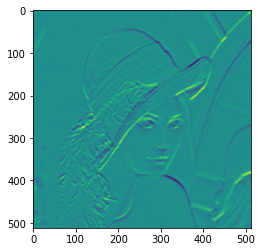

In [ ]:
plt.imshow(Gx)

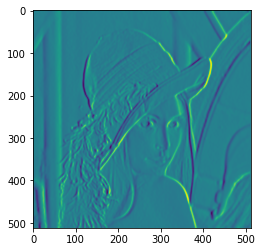

In [ ]:
plt.imshow(Gy)

This operator also produce more prominent edges than default but is almost similar to the sobel feldman operator 

2.3

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# My optimal thresholding
highThresholdRatio = 0.1
lowThresholdRatio = 0.85

# Load image
img = cv.imread('lenna.png')

# Convert to grayscale
img = cv.cvtColor(np.float32(img), cv.COLOR_BGR2GRAY)

# Apply Gaussian filter
img_smooth = cv.GaussianBlur(img, (5,5), 1)

# Calculate gradient magnitude and direction
sobel_x = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
sobel_y = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
Gx = cv.filter2D(src=img_smooth, kernel=sobel_x, ddepth=-1)
Gy = cv.filter2D(src=img_smooth, kernel=sobel_y, ddepth=-1)
#Gx = cv.Sobel(img_smooth, cv.CV_64F, 1, 0, ksize=3)
#Gy = cv.Sobel(img_smooth, cv.CV_64F, 0, 1, ksize=3)
gradient_mag = np.sqrt(Gx**2 + Gy**2)
gradient_dir = np.arctan2(Gy, Gx) * 180 / np.pi

# Non-maximum suppression
M, N = img.shape
nms = np.zeros((M, N), dtype=np.int32)
for i in range(1, M-1):
    for j in range(1, N-1):
        dir = gradient_dir[i, j]
        if dir < 0:
            dir += 180
        dir_round = int((dir + 22.5) / 45) % 4
        if dir_round == 0:  # East-West (horizontal)
            if (gradient_mag[i, j] > gradient_mag[i, j-1]) and (gradient_mag[i, j] > gradient_mag[i, j+1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 1:  # North-East/South-West
            if (gradient_mag[i, j] > gradient_mag[i-1, j+1]) and (gradient_mag[i, j] > gradient_mag[i+1, j-1]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 2:  # North-South (vertical)
            if (gradient_mag[i, j] > gradient_mag[i-1, j]) and (gradient_mag[i, j] > gradient_mag[i+1, j]):
                nms[i, j] = gradient_mag[i, j]
        elif dir_round == 3:  # North-West/South-East
            if (gradient_mag[i, j] > gradient_mag[i-1, j-1]) and (gradient_mag[i, j] > gradient_mag[i+1, j+1]):
                nms[i, j] = gradient_mag[i, j]

# Hysteresis thresholding
high_threshold = np.max(nms) * highThresholdRatio
low_threshold = high_threshold * lowThresholdRatio
strong_edges = nms > high_threshold
weak_edges = (nms > low_threshold) & (nms < high_threshold)
for i in range(1, M-1):
    for j in range(1, N-1):
        if weak_edges[i, j]:
            if strong_edges[i-1:i+2, j-1:j+2].any():
                strong_edges[i, j] = True
                weak_edges[i, j] = False

In [ ]:
  # Opencv Canny
img = cv.imread('lenna.png', 0)
edges = cv.Canny(img,100,200)

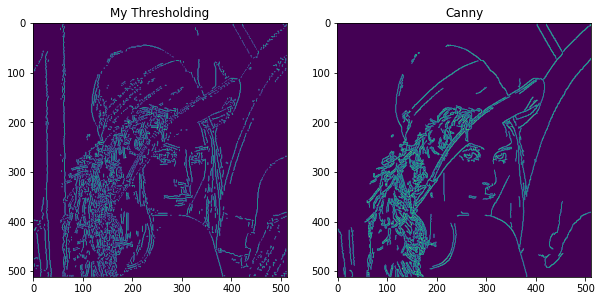

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10,5))
axs[0].imshow(strong_edges)
axs[1].imshow(edges)

# Add titles to the subplots
axs[0].set_title("My Thresholding")
axs[1].set_title("Canny")

# Show the figure
plt.show()